In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
# set dates
today = datetime.date.today()
week_ago = today - datetime.timedelta(7)
month_ago = today - datetime.timedelta(30)
year_ago = today - datetime.timedelta(365)

print(today)
print(week_ago)
print(month_ago)
print(year_ago)

2020-03-13
2020-03-06
2020-02-12
2019-03-14


In [39]:
#assets = ['BTC','ETH','XRP','BCH','Gold','S&P500']

big_df = pd.DataFrame(columns=['price','week','month','year'])
week_df = pd.DataFrame(columns=[week_ago + datetime.timedelta(x) for x in range(8)])
month_df = pd.DataFrame(columns=[month_ago + datetime.timedelta(x) for x in range(31)])
year_df = pd.DataFrame(columns=[year_ago + datetime.timedelta(x) for x in range(366)])

print(big_df)
print(week_df)
print(month_df)
print(year_df)

Empty DataFrame
Columns: [price, week, month, year]
Index: []
Empty DataFrame
Columns: [2020-03-06, 2020-03-07, 2020-03-08, 2020-03-09, 2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13]
Index: []
Empty DataFrame
Columns: [2020-02-12, 2020-02-13, 2020-02-14, 2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 2020-02-19, 2020-02-20, 2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24, 2020-02-25, 2020-02-26, 2020-02-27, 2020-02-28, 2020-02-29, 2020-03-01, 2020-03-02, 2020-03-03, 2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, 2020-03-08, 2020-03-09, 2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13]
Index: []

[0 rows x 31 columns]
Empty DataFrame
Columns: [2019-03-14, 2019-03-15, 2019-03-16, 2019-03-17, 2019-03-18, 2019-03-19, 2019-03-20, 2019-03-21, 2019-03-22, 2019-03-23, 2019-03-24, 2019-03-25, 2019-03-26, 2019-03-27, 2019-03-28, 2019-03-29, 2019-03-30, 2019-03-31, 2019-04-01, 2019-04-02, 2019-04-03, 2019-04-04, 2019-04-05, 2019-04-06, 2019-04-07, 2019-04-08, 2019-04-09, 2019-04-10, 2019-04-11, 2

In [81]:
week_df.loc['XRP']

2020-03-06    0.2040
2020-03-07    0.2095
2020-03-08    0.2116
2020-03-09    0.2081
2020-03-10    0.1385
2020-03-11    0.1602
2020-03-12    0.1591
2020-03-13    0.3165
Name: XRP, dtype: float64

In [70]:
# get BTC data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['BTC'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['BTC'] = [data[-8 + x]['close'] for x in range(8)]
month_df.loc['BTC'] = [data[-31 + x]['close'] for x in range(31)]
year_df.loc['BTC'] = [data[0 + x]['close'] for x in range(366)]

print('BTC')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

BTC
Week Change: -30.87%
Month Change: -46.24%
Year Change: 41.84%


In [71]:
# get ETH data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['ETH'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['ETH'] = [data[-8 + x]['close'] for x in range(8)]
month_df.loc['ETH'] = [data[-31 + x]['close'] for x in range(31)]
year_df.loc['ETH'] = [data[0 + x]['close'] for x in range(366)]

print('ETH')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

ETH
Week Change: -32.47%
Month Change: -52.77%
Year Change: -1.29%


In [82]:
# get XRP data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=XRP&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['XRP'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['XRP'] = [data[-8 + x]['close'] for x in range(8)]
month_df.loc['XRP'] = [data[-31 + x]['close'] for x in range(31)]
year_df.loc['XRP'] = [data[-366 + x]['close'] for x in range(366)]

print('XRP')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

XRP
Week Change: -21.81%
Month Change: -52.57%
Year Change: -49.61%


In [73]:
# get BCH data
url = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BCH&tsym=USD&limit=365'
response = requests.get(url)
data = response.json()['Data']['Data']

today_price = data[-1]['close']
week_ago_price = data[-7]['close']
month_ago_price = data[-30]['close']
year_ago_price = data[0]['close']

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['BCH'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['BCH'] = [data[-8 + x]['close'] for x in range(8)]
month_df.loc['BCH'] = [data[-31 + x]['close'] for x in range(31)]
year_df.loc['BCH'] = [data[0 + x]['close'] for x in range(366)]

print('BCH')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

BCH
Week Change: -35.12%
Month Change: -64.14%
Year Change: 23.29%


In [23]:
week_df = week_df.drop(today,axis=1)

In [74]:
# get gold data
import json
import sys
from io import StringIO
import math

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_MGC1.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'

response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

df['Date'] = pd.to_datetime(df['Date'])
idx = pd.date_range(year_ago, today)
df = df.set_index('Date').reindex(idx).reset_index()

today_price = df.iloc[-1]['Last']

for x in range(10):
    p = df.iloc[-1-x]['Last']
    if math.isnan(p) == False:
        today_price = p
        break

week_ago_price = df.iloc[-8]['Last']

for x in range(10):
    p = df.iloc[-8-x]['Last']
    if math.isnan(p) == False:
        week_ago_price = p
        break

month_ago_price = df.iloc[-31-x]['Last']  

for x in range(10):
    p = df.iloc[-31-x]['Last']
    if math.isnan(p) == False:
        month_ago_price = p
        break

year_ago_price = df.iloc[-1]['Last'] 

for x in range(10):
    p = df.iloc[0+x]['Last']
    if math.isnan(p) == False:
        year_ago_price = p
        break
        
week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['Gold'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['Gold'] = [df.iloc[-8+x]['Last'] for x in range(8)]
month_df.loc['Gold'] = [df.iloc[-31+x]['Last'] for x in range(31)]
year_df.loc['Gold'] = [df.iloc[0+x]['Last'] for x in range(366)]

week_df.loc['Gold', week_ago] = week_ago_price
month_df.loc['Gold', month_ago] = month_ago_price
year_df.loc['Gold', year_ago] = year_ago_price

print('Gold')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

Gold
Week Change: -8.7%
Month Change: -2.18%
Year Change: 17.98%


In [75]:
# get S&P500 data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_ES2.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

df['Date'] = pd.to_datetime(df['Date'])
idx = pd.date_range(year_ago, today)
df = df.set_index('Date').reindex(idx).reset_index()

today_price = df.iloc[-1]['Last']

for x in range(10):
    p = df.iloc[-1-x]['Last']
    if math.isnan(p) == False:
        today_price = p
        break

week_ago_price = df.iloc[-8]['Last']

for x in range(10):
    p = df.iloc[-8-x]['Last']
    if math.isnan(p) == False:
        week_ago_price = p
        break
        
month_ago_price = df.iloc[-31]['Last']

for x in range(10):
    p = df.iloc[-31-x]['Last']
    if math.isnan(p) == False:
        month_ago_price = p
        break
        
year_ago_price = df.iloc[0]['Last']

for x in range(10):
    p = df.iloc[0+x]['Last']
    if math.isnan(p) == False:
        year_ago_price = p
        break

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['S&P500'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['S&P500'] = [df.iloc[-8+x]['Last'] for x in range(8)]
month_df.loc['S&P500'] = [df.iloc[-31+x]['Last'] for x in range(31)]
year_df.loc['S&P500'] = [df.iloc[0+x]['Last'] for x in range(366)]

week_df.loc['S&P500', week_ago] = week_ago_price
month_df.loc['S&P500', month_ago] = month_ago_price
year_df.loc['S&P500', year_ago] = year_ago_price

print('S&P500')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

S&P500
Week Change: -10.15%
Month Change: -21.54%
Year Change: -5.68%


In [76]:
# get Dow Jones data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/CHRIS/CME_YM1.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

df['Date'] = pd.to_datetime(df['Date'])
idx = pd.date_range(year_ago, today)
df = df.set_index('Date').reindex(idx).reset_index()

today_price = df.iloc[-1]['Last']

for x in range(10):
    p = df.iloc[-1-x]['Last']
    if math.isnan(p) == False:
        today_price = p
        break

week_ago_price = df.iloc[-8]['Last']

for x in range(10):
    p = df.iloc[-8-x]['Last']
    if math.isnan(p) == False:
        week_ago_price = p
        break
        
month_ago_price = df.iloc[-31]['Last']

for x in range(10):
    p = df.iloc[-31-x]['Last']
    if math.isnan(p) == False:
        month_ago_price = p
        break
        
year_ago_price = df.iloc[0]['Last']

for x in range(10):
    p = df.iloc[0+x]['Last']
    if math.isnan(p) == False:
        year_ago_price = p
        break

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['DJIA'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['DJIA'] = [df.iloc[-8+x]['Last'] for x in range(8)]
month_df.loc['DJIA'] = [df.iloc[-31+x]['Last'] for x in range(31)]
year_df.loc['DJIA'] = [df.iloc[0+x]['Last'] for x in range(366)]

week_df.loc['DJIA', week_ago] = week_ago_price
month_df.loc['DJIA', month_ago] = month_ago_price
year_df.loc['DJIA', year_ago] = year_ago_price

print('DJIA')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

DJIA
Week Change: -11.43%
Month Change: -22.66%
Year Change: -11.22%


In [77]:
# get US Treasury Yield data
import json
import sys
from io import StringIO

url = 'https://www.quandl.com/api/v3/datasets/USTREASURY/YIELD.csv?start_date=' + \
        str(year_ago) + '&end_date=' + str(today) + '&api_key=xbnZxySJ-eRS3smwD_JN'
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))

df['Date'] = pd.to_datetime(df['Date'])
idx = pd.date_range(year_ago, today)
df = df.set_index('Date').reindex(idx).reset_index()

today_price = df.iloc[-1]['10 YR']

for x in range(10):
    p = df.iloc[-1-x]['10 YR']
    if math.isnan(p) == False:
        today_price = p
        break

week_ago_price = df.iloc[-8]['10 YR']

for x in range(10):
    p = df.iloc[-8-x]['10 YR']
    if math.isnan(p) == False:
        week_ago_price = p
        break
        
month_ago_price = df.iloc[-31]['10 YR']

for x in range(10):
    p = df.iloc[-31-x]['10 YR']
    if math.isnan(p) == False:
        month_ago_price = p
        break
        
year_ago_price = df.iloc[0]['10 YR']

for x in range(10):
    p = df.iloc[0+x]['10 YR']
    if math.isnan(p) == False:
        year_ago_price = p
        break

week_pct = (today_price - week_ago_price) / week_ago_price * 100
month_pct = (today_price - month_ago_price) / month_ago_price * 100
year_pct = (today_price - year_ago_price) /  year_ago_price * 100

big_df.loc['US10YR'] = [today_price, week_pct, month_pct, year_pct]
week_df.loc['US10YR'] = [df.iloc[-8+x]['10 YR'] for x in range(8)]
month_df.loc['US10YR'] = [df.iloc[-31+x]['10 YR'] for x in range(31)]
year_df.loc['US10YR'] = [df.iloc[0+x]['10 YR'] for x in range(366)]

week_df.loc['US10YR', week_ago] = week_ago_price
month_df.loc['US10YR', month_ago] = month_ago_price
year_df.loc['US10YR', year_ago] = year_ago_price

print('US10YR')
print('Week Change: ' + str(round(week_pct,2)) + '%')
print('Month Change: ' + str(round(month_pct,2)) + '%')
print('Year Change: ' + str(round(year_pct,2)) + '%')

US10YR
Week Change: 27.03%
Month Change: -41.98%
Year Change: -64.26%


In [59]:
# show main dataframe
big_df

,price,week,month,year
ETH,133.5800,-33.126408,-53.234841,-2.253768
BTC,5501.3400,-31.725424,-46.900159,40.087291
XRP,0.1569,-23.088235,-53.345227,-50.426540
BCH,175.0200,-35.897154,-64.570133,21.803883
Gold,1528.8000,-8.701105,-2.175582,17.981170
S&P500,2437.2500,-17.451312,-27.913339,-13.342222
DJIA,20917.0000,-18.860313,-29.152554,-18.674184
US10YR,0.9400,27.027027,-41.975309,-64.258555


Text(0, 0.5, 'relative value (%)')

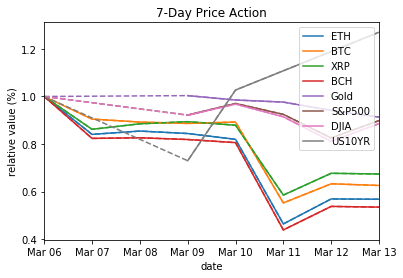

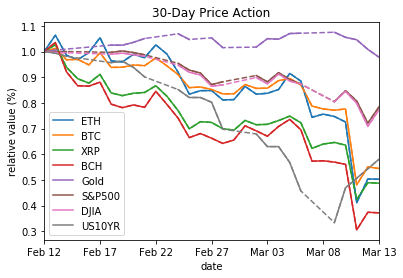

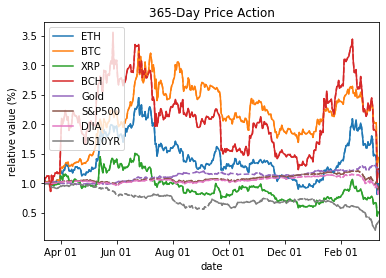

In [126]:
# plot changes in relative value
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#fig, (ax1, ax2) = subplots(nrows=1, ncols=2)

rel_val_week_df = week_df.T.astype('float64')
rel_val_month_df = month_df.T.astype('float64')
rel_val_year_df = year_df.T.astype('float64')

rel_val_week_df = rel_val_week_df.apply(lambda x: x / x[0])
rel_val_month_df = rel_val_month_df.apply(lambda x: x / x[0])
rel_val_year_df = rel_val_year_df.apply(lambda x: x / x[0])

filled_rel_val_week_df = rel_val_week_df.interpolate(method ='linear', limit_direction ='forward')
filled_rel_val_month_df = rel_val_month_df.interpolate(method ='linear', limit_direction ='forward')
filled_rel_val_year_df = rel_val_year_df.interpolate(method ='linear', limit_direction ='forward')

ax1 = rel_val_week_df.plot()
filled_rel_val_week_df.plot(ax=ax1, linestyle='--', legend=False, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax2 = rel_val_month_df.plot()
filled_rel_val_month_df.plot(ax=ax2, linestyle='--', legend=False, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax3 = rel_val_year_df.plot()
filled_rel_val_year_df.plot(ax=ax3, linestyle='--', legend=False, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

ax1.set_title("7-Day Price Action")
ax2.set_title("30-Day Price Action")
ax3.set_title("365-Day Price Action")

ax2.set_xticks(month_df.columns.values[::5])
ax3.set_xticks([x for x in list(year_df.columns.values) if x.day == 1][::2])

ax1.set_xlabel("date")
ax2.set_xlabel("date")
ax3.set_xlabel("date")

ax1.set_ylabel("relative value (%)")
ax2.set_ylabel("relative value (%)")
ax3.set_ylabel("relative value (%)")